### Introduction for the NLP Project on Predicting Heart Disease from Clinical Notes

#### Project Overview
This project focuses on leveraging Natural Language Processing (NLP) techniques to predict heart disease from clinical notes. Clinical notes are unstructured text data that contain valuable information about patients' medical history, symptoms, and lifestyle factors. The goal is to extract relevant features from these notes and build a machine learning model to predict the likelihood of heart disease.
Dataset Description
The synthetic dataset includes the following columns:
•	Clinical Note: A free-text entry describing the patient's symptoms, medical history, and lifestyle information.
•	Heart Disease: The target variable indicating whether the patient has been diagnosed with heart disease (0: No, 1: Yes).
Sample clinical notes cover various scenarios, such as patients with hypertension, diabetes, smoking history, exercise habits, and more.
Project Steps
1.	Data Generation: Create a synthetic dataset of clinical notes with corresponding heart disease diagnoses.
2.	Data Preprocessing: Clean and prepare the text data for NLP processing.
3.	NLP Processing: Extract features from the text data using TF-IDF vectorization.
4.	Model Building: Develop a predictive model using a Random Forest classifier.
5.	Model Evaluation: Evaluate the model's performance using metrics like confusion matrix, classification report, and ROC curve.
6.	Visualization: Present the model's performance and key insights derived from the text data.
Expected Outcomes
By the end of this project, we aim to have an effective model that can predict heart disease based on the textual information found in clinical notes. This project demonstrates the potential of NLP in transforming unstructured clinical data into actionable insights, aiding in the early detection and management of heart disease.


#### Step 1: Create Pseudo Dataset

In [2]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)
num_samples = 1000

# Sample clinical notes
clinical_notes = [
    "Patient has a history of hypertension and exhibits symptoms of chest pain and shortness of breath.",
    "No significant medical history. Reports regular exercise and balanced diet.",
    "Diabetic patient with occasional chest pain and high cholesterol levels.",
    "Non-smoker with a family history of heart disease. Reports irregular heartbeat and fatigue.",
    "Former smoker with controlled hypertension. No current symptoms of heart issues."
]

# Generate the dataset
data = {
    'clinical_note': np.random.choice(clinical_notes, num_samples),
    'heart_disease': np.random.choice([0, 1], num_samples, p=[0.7, 0.3])
}

df = pd.DataFrame(data)
df.to_csv('synthetic_clinical_notes.csv', index=False)


### Step 2: Data Preprocessing

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('synthetic_clinical_notes.csv')

# Preprocess the text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(df['clinical_note']).toarray()
y = df['heart_disease']


### Step 3: NLP Processing

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Model Building

Build and evaluate a predictive model using Random Forest.


c:\Users\taten\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\taten\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\taten\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.69      1.00      0.81       137
           1       0.00      0.00      0.00        63

    accuracy                           0.69       200
   macro avg       0.34      0.50      0.41       200
weighted avg       0.47      0.69      0.56       200



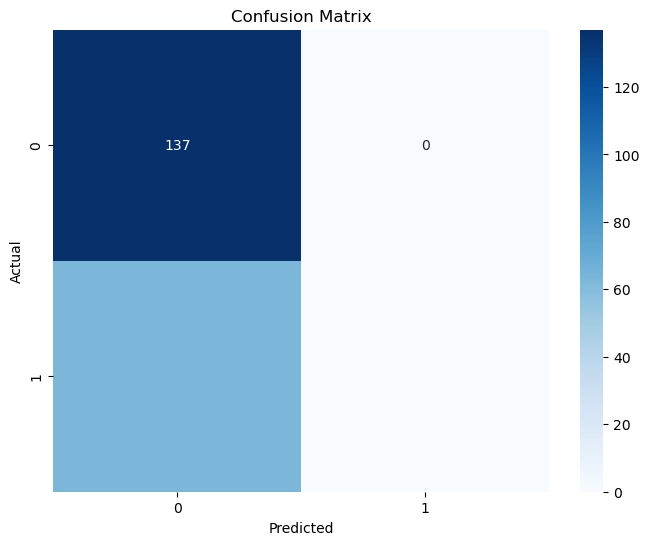

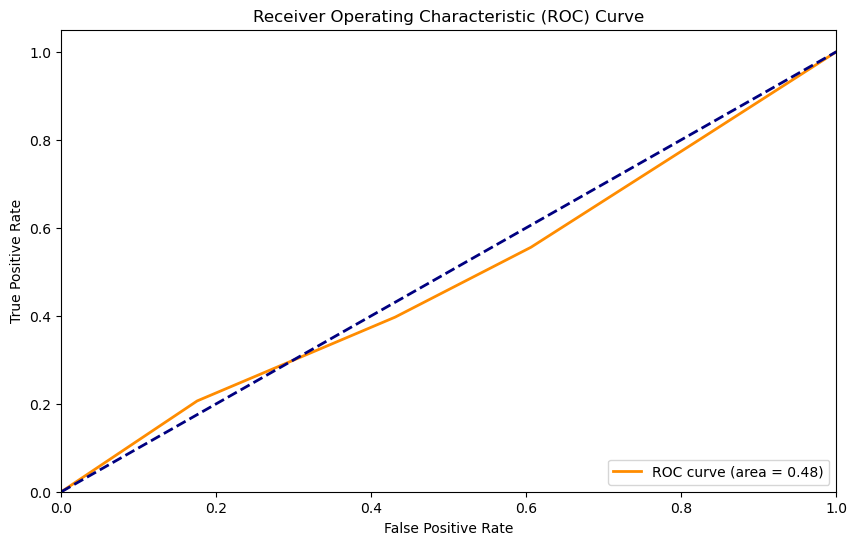

In [5]:
# Train a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
